In [4]:
import pydataset
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

# train test split from sklearn
from sklearn.model_selection import train_test_split
# imputer from sklearn
from sklearn.impute import SimpleImputer

# data acquisition

In a jupyter notebook, classification_exercises.ipynb, use a python module (pydata or seaborn datasets) containing datasets as a source from the iris data. Create a pandas dataframe, df_iris, from this data.

- print the first 3 rows
- print the number of rows and columns (shape)
- print the column names
- print the data type of each column
- print the summary statistics for each of the numeric variables



In [ ]:
df_iris = pydataset.data('iris')

In [ ]:
df_iris.head(3)

In [ ]:
df_iris.shape

In [ ]:
df_iris.columns

In [ ]:
df_iris.dtypes

In [ ]:
df_iris.describe()



Read the Table1_CustDetails table from your spreadsheet exercises google sheet into a dataframe named df_google_sheets.

Make sure that the spreadsheet is publicly visible under your sharing settings.

- assign the first 100 rows to a new dataframe, df_google_sheets_sample
- print the number of rows of your original dataframe
- print the column names that have a data type of object
- compute the range for each of the numeric variables.



In [ ]:
sheet_url = 'https://docs.google.com/spreadsheets/d/10wggtv3PSKYyRMgvTOJ6d9ksuw-FguyU_7yfishNlgk/edit#gid=1023018493'
export_sheet_url = sheet_url.replace('/edit#gid=', '/export?format=csv&gid=')
df_google_sheet = pd.read_csv(export_sheet_url)
df_google_sheet

In [ ]:
df_google_sheets_sample = df_google_sheet.head(100)

In [ ]:
df_google_sheet.shape

In [ ]:
df_google_sheet.dtypes[df_google_sheet.dtypes=='object']
#alt from class
df_google_sheet.select_dtypes(include='object').columns

In [ ]:
df_google_sheet.describe().loc[['max', 'min']]

In [ ]:
df_google_sheet.describe().loc['max'] - df_google_sheet.describe().loc['min']



Download your spreadsheet exercises google sheet as an excel file (File → Download → Microsoft Excel). Read the Table1_CustDetails worksheet into a dataframe named df_excel.

- assign the first 100 rows to a new dataframe, df_excel_sample
- print the number of rows of your original dataframe
- print the first 5 column names
- print the column names that have a data type of object
- compute the range for each of the numeric variables.



In [ ]:
df_excel = pd.read_excel('Table1_CustDetails.xlsx')

In [ ]:
df_excel_sample = df_excel.head(100)

In [ ]:
df_excel.shape

In [ ]:
df_excel.columns[:5]

In [ ]:
df_excel.dtypes[df_excel.dtypes=='object']

In [ ]:
df_excel.describe().loc[['max', 'min']]

In [ ]:
(df_excel.describe().loc['max'] - df_excel.describe().loc['min'])[['monthly_charges', 'total_charges', 'tenure']]

In [ ]:
#alt from class: make a transposed data frame
stats_excel = df_excel.describe().T
stats_excel['range'] = stats_excel['max'] - stats_excel['min']
stats_excel['range']



Read the data from this google sheet into a dataframe, df_google.

- print the first 3 rows
- print the number of rows and columns
- print the column names
- print the data type of each column
- print the summary statistics for each of the numeric variables
- print the unique values for each of your categorical variables



In [ ]:
sheet_url = 'https://docs.google.com/spreadsheets/d/1Uhtml8KY19LILuZsrDtlsHHDC9wuDGUSe8LTEwvdI5g/edit#gid=341089357'
export_sheet_url = sheet_url.replace('/edit#gid=', '/export?format=csv&gid=')
df_google = pd.read_csv(export_sheet_url)
df_google

In [ ]:
df_google.shape

In [ ]:
df_google.columns

In [ ]:
df_google.dtypes

In [ ]:
df_google.describe()

In [ ]:
df_google[['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']].nunique()

In [ ]:
df_google.select_dtypes('object')

#### acquire file test

In [ ]:
import acquire

In [ ]:
acquire.get_titanic_data()

In [ ]:
acquire.get_iris_data()

In [ ]:
acquire.get_telco_data()

# data preperation

### iris data

1. Use the function defined in acquire.py to load the iris data. 

In [ ]:
iris = acquire.get_iris_data()
iris.head()

2. Drop the species_id and measurement_id columns. 

In [ ]:
iris.drop(columns = ['species_id', 'measurement_id', 'Unnamed: 0'], inplace = True)

3. Rename the species_name column to just species. 

In [ ]:
iris.rename(columns = {'species_name':'species'}, inplace=True)

4. Create dummy variables of the species name and concatenate onto the iris dataframe. (This is for practice, we don't always have to encode the target, but if we used species as a feature, we would need to encode it).

In [ ]:
dummy_df = pd.get_dummies(iris[['species']], dummy_na=False, drop_first=True)
iris = pd.concat([iris, dummy_df], axis = 1)
iris.head()

5. Create a function named prep_iris that accepts the untransformed iris data, and returns the data with the transformations above applied.

In [ ]:
def prep_iris(df):
    df.drop(columns = ['species_id', 'measurement_id', 'Unnamed: 0'], inplace = True)
    df.rename(columns = {'species_name':'species'}, inplace=True)
    dummy_df = pd.get_dummies(iris[['species']], dummy_na=False, drop_first=True)
    df = pd.concat([df, dummy_df], axis = 1)
    return df

iris = prep_iris(acquire.get_iris_data())
iris.head()

### titanic dataset

1. Use the function defined in acquire.py to load the Titanic data

In [ ]:
titanic = acquire.get_titanic_data()
titanic.head()

2. Drop any unnecessary, unhelpful, or duplicated columns.

In [ ]:
titanic.drop(columns = ['Unnamed: 0', 'passenger_id', 'embarked', 'pclass', 'deck'], inplace= True)
titanic.rename(columns = {'class': 'pclass'}, inplace = True)
titanic.head()

3. Encode the categorical columns. Create dummy variables of the categorical columns and concatenate them onto the dataframe.

In [ ]:
dummy_df = pd.get_dummies(titanic[['sex', 'embark_town']], dummy_na = False, drop_first = [True, True])
titanic = pd.concat([titanic, dummy_df], axis = 1)
titanic.head()

4. Create a function named prep_titanic that accepts the raw titanic data, and returns the data with the transformations above applied.

In [ ]:
def prep_titanic(df):
    '''
    cleans the titanic data 
    '''
    df.drop_duplicates(inplace=True)
    col_to_drop = ['Unnamed: 0','embarked', 'class', 'passenger_id', 'deck']
    df = df.drop(columns=col_to_drop)
    df['embark_town'] = df.embark_town.fillna(value='Southampton')
    dummy_df = pd.get_dummies(df[['sex', 'embark_town']], dummy_na = False, drop_first = [True, True])
    df = pd.concat([df, dummy_df], axis = 1)
    return df.drop(columns=['sex', 'embark_town'])

prep_titanic(acquire.get_titanic_data()).head()

### telco dataset

1. Use the function defined in acquire.py to load the Telco data. 

In [ ]:
telco = acquire.get_telco_data()
telco.head()

2. Drop any unnecessary, unhelpful, or duplicated columns. This could mean dropping foreign key columns but keeping the corresponding string values, for example.

In [ ]:
telco.info()

In [ ]:
telco.drop(columns = ['internet_service_type_id', 'contract_type_id', 'payment_type_id', 'Unnamed: 0'], inplace=True)

3. Encode the categorical columns. Create dummy variables of the categorical columns and concatenate them onto the dataframe.

In [ ]:
# get a list of the object columns, exclude customer_id because it is the foreign key
cat_cols = list(telco.select_dtypes('object').iloc[:,1:].columns)
cat_cols.remove('total_charges') #this data column will need to be changed to float
cat_cols

In [ ]:
dummy_df = pd.get_dummies(telco[cat_cols], dummy_na = False, drop_first = True)
telco = pd.concat([telco, dummy_df], axis = 1)
telco.head()

In [ ]:
# replace the ' ' values in the total_charges series with 0.  these customers have a tenure of 0; therefore 
# monthly_charges * 0 = 0
telco.total_charges[telco.total_charges == ' '] = telco.total_charges[telco.total_charges == ' '].replace(' ', 0, inplace=True)
telco.total_charges[telco.total_charges == ' ']

4. Create a function named prep_telco that accepts the raw telco data, and returns the data with the transformations above applied.

In [ ]:
def prep_telco(df):
    df.drop(columns = ['internet_service_type_id', 'contract_type_id', 'payment_type_id', 'Unnamed: 0'], inplace=True)
    cat_cols = list(df.select_dtypes('object').iloc[:,1:].columns)
    cat_cols.remove('total_charges') #this data column will need to be changed to floatdummy_df = pd.get_dummies(telco[cat_cols], dummy_na = False, drop_first = True)
    dummy_df = pd.get_dummies(df[cat_cols], dummy_na = False, drop_first = True)
    df = pd.concat([df, dummy_df], axis = 1)
    #drop the empty total_charges rows
    df = df[df.total_charges != ' ']
    df.total_charges = df.total_charges.astype(float)
    return df

preped_telco = prep_telco(acquire.get_telco_data())
preped_telco.head().info()

In [ ]:
def split_telco_data(df):
    df = prep_telco(df)
    train, test = train_test_split(df, train_size = 0.8, stratify = df.churn)
    train, validate = train_test_split(train, train_size = 0.7, stratify = train.churn)
    return train, test, validate

train, test, validate = split_telco_data(acquire.get_telco_data())
train.head()

In [ ]:
import prepare
import acquire
telco_df = acquire.get_telco_data()
train, validate, test = prepare.split_telco_data(telco_df)
train.head()

# exploratory analysis

## iris_db

1. Acquire, prepare & split your data. 

In [183]:
import prepare
import acquire
i_train, i_validate, i_test = prepare.split_iris_data(acquire.get_iris_data())
i_train.sample(3)

,sepal_length,sepal_width,petal_length,petal_width,species,species_versicolor,species_virginica
135,7.7,3.0,6.1,2.3,virginica,0,1
107,7.3,2.9,6.3,1.8,virginica,0,1
86,6.7,3.1,4.7,1.5,versicolor,1,0


2. Univariate Stats

- For each measurement type (quantitative variable): create a histogram, boxplot, & compute descriptive statistics (using .describe()).
- For each species (categorical variable): create a frequency table and a bar plot of those frequencies.
- Document takeaways & any actions.

In [184]:
i_train.describe().iloc[:,0:4]

,sepal_length,sepal_width,petal_length,petal_width
count,84.000000,84.000000,84.000000,84.000000
mean,5.882143,3.040476,3.811905,1.205952
std,0.853647,0.454196,1.788882,0.758780
min,4.400000,2.200000,1.300000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.900000,3.000000,4.400000,1.300000
75%,6.400000,3.300000,5.200000,1.800000
max,7.900000,4.400000,6.700000,2.500000


Text(0.5, 1.0, 'sepal_length')

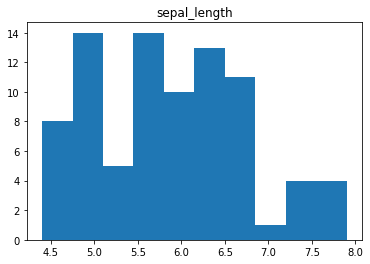

In [185]:
plt.hist(i_train.sepal_length)
plt.title('sepal_length')

Text(0.5, 1.0, 'sepal_width')

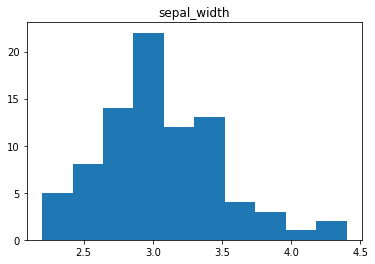

In [46]:
plt.hist(i_train.sepal_width)
plt.title('sepal_width')

Text(0.5, 1.0, 'petal_length')

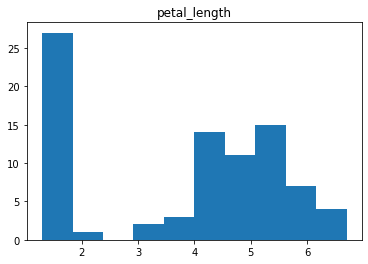

In [186]:
plt.hist(i_train.petal_length)
plt.title('petal_length')

Text(0.5, 1.0, 'petal_width')

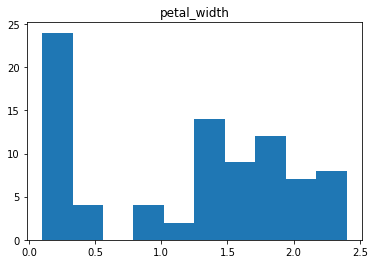

In [48]:
plt.hist(i_train.petal_width)
plt.title('petal_width')

<AxesSubplot:xlabel='species', ylabel='sepal_length'>

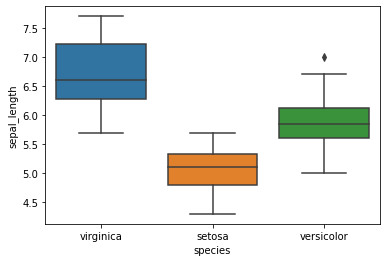

In [49]:
sns.boxplot(data = i_train, y= 'sepal_length', x = 'species')

<AxesSubplot:xlabel='species', ylabel='sepal_width'>

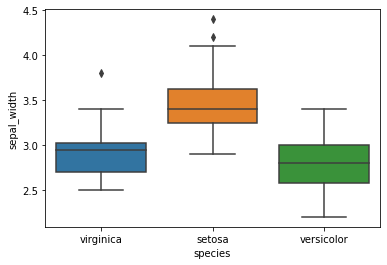

In [50]:
sns.boxplot(data = i_train, y = 'sepal_width', x = 'species')

<AxesSubplot:xlabel='species', ylabel='petal_length'>

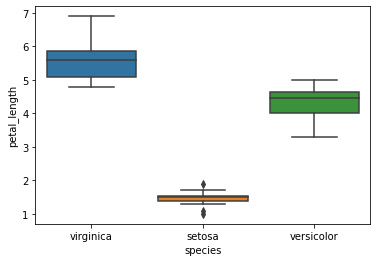

In [51]:
sns.boxplot(data = i_train, y= 'petal_length', x = 'species')

<AxesSubplot:xlabel='species', ylabel='petal_width'>

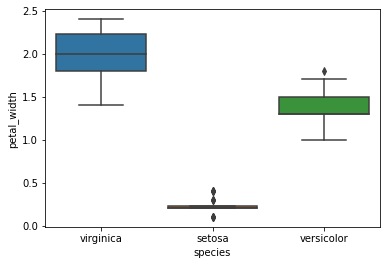

In [52]:
sns.boxplot(data = i_train, y= 'petal_width', x = 'species')

- For each species (categorical variable): create a frequency table and a bar plot of those frequencies.

In [53]:
i_train.species.value_counts(), i_train.species.value_counts('normalize')

(virginica     28
 setosa        28
 versicolor    28
 Name: species, dtype: int64,
 virginica     0.333333
 setosa        0.333333
 versicolor    0.333333
 Name: species, dtype: float64)

(array([28.,  0.,  0.,  0.,  0., 28.,  0.,  0.,  0., 28.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <BarContainer object of 10 artists>)

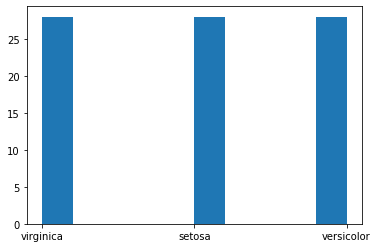

In [54]:
plt.hist(i_train.species)

sepal length and width are normal distributed

petal width and length are skewed right

3. Bivariate Stats

- Visualize each measurement type (y-axis) with the species variable (x-axis) using barplots, adding a horizontal line showing the overall mean of the metric (y-axis).
- For each measurement type, compute the descriptive statistics for each species.
- For virginica & versicolor: Compare the mean petal_width using the Mann-Whitney test (scipy.stats.mannwhitneyu) to see if there is a significant difference between the two groups. Do the same for the other measurement types.
- Document takeaways & any actions

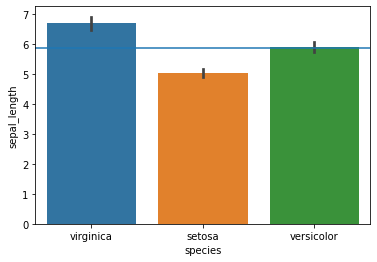

In [55]:
mean_val = i_train.sepal_length.mean()
sns.barplot(data=i_train, y='sepal_length', x='species')
plt.axhline(mean_val)

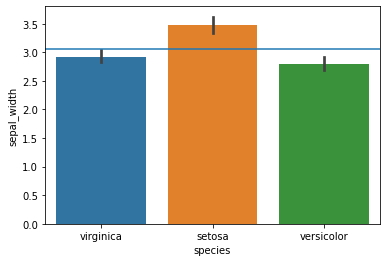

In [56]:
mean_val = i_train.sepal_width.mean()
sns.barplot(data=i_train, y='sepal_width', x='species')
plt.axhline(mean_val)

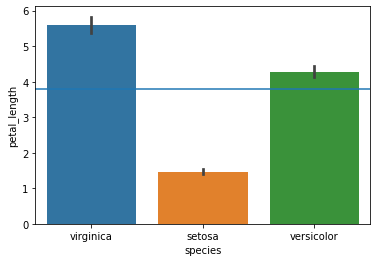

In [57]:
mean_val = i_train.petal_length.mean()
sns.barplot(data=i_train, y='petal_length', x='species')
plt.axhline(mean_val)

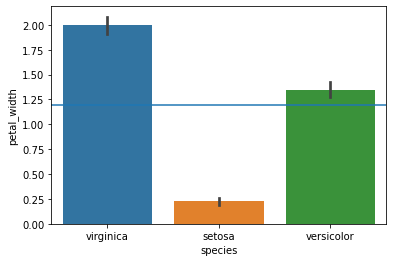

In [58]:
mean_val = i_train.petal_width.mean()
sns.barplot(data=i_train, y='petal_width', x='species')
plt.axhline(mean_val)

- For each measurement type, compute the descriptive statistics for each species.

In [59]:
i_train.groupby('species').describe().T.loc[:'petal_width']

species                setosa  versicolor  virginica
sepal_length count  28.000000   28.000000  28.000000
             mean    5.042857    5.917857   6.700000
             std     0.378524    0.461121   0.620633
             min     4.300000    5.000000   5.700000
             25%     4.800000    5.600000   6.275000
             50%     5.100000    5.850000   6.600000
             75%     5.325000    6.125000   7.225000
             max     5.700000    7.000000   7.700000
sepal_width  count  28.000000   28.000000  28.000000
             mean    3.471429    2.796429   2.925000
             std     0.374024    0.317959   0.295177
             min     2.900000    2.200000   2.500000
             25%     3.250000    2.575000   2.700000
             50%     3.400000    2.800000   2.950000
             75%     3.625000    3.000000   3.025000
             max     4.400000    3.400000   3.800000
petal_length count  28.000000   28.000000  28.000000
             mean    1.467857    4.278571   5.603571
             std     0.178582    0.435768   0.608265
             min     1.000000    3.300000   4.800000
             25%     1.400000    4.000000   5.100000
             50%     1.500000    4.450000   5.600000
             75%     1.525000    4.625000   5.875000
             max     1.900000    5.000000   6.900000
petal_width  count  28.000000   28.000000  28.000000
             mean    0.225000    1.350000   1.996429
             std     0.088715    0.208167   0.244165
             min     0.100000    1.000000   1.400000
             25%     0.200000    1.300000   1.800000
             50%     0.200000    1.300000   2.000000
             75%     0.225000    1.500000   2.225000
             max     0.400000    1.800000   2.400000

- For virginica & versicolor: Compare the mean petal_width using the Mann-Whitney test (scipy.stats.mannwhitneyu) to see if there is a significant difference between the two groups. Do the same for the other measurement types.

In [71]:
# H_0 : virginica and versicolor have the same mean of the variable

In [191]:
alpha = 0.05
t, p = stats.mannwhitneyu(i_train[i_train.species == 'virginica'].petal_width,
                          i_train[i_train.species == 'versicolor'].petal_width)
p < alpha, p

(True, 7.381727292213524e-10)

In [192]:
alpha = 0.5
t, p = stats.mannwhitneyu(i_train[i_train.species == 'virginica'].petal_length,
                          i_train[i_train.species == 'versicolor'].petal_length)
p < alpha, p

(True, 3.8648172284131784e-10)

In [193]:
alpha = 0.5
t, p = stats.mannwhitneyu(i_train[i_train.species == 'virginica'].sepal_width,
                          i_train[i_train.species == 'versicolor'].sepal_width)
p < alpha, p

(True, 0.0062025869201255395)

In [194]:
alpha = 0.5
t, p = stats.mannwhitneyu(i_train[i_train.species == 'virginica'].sepal_length,
                          i_train[i_train.species == 'versicolor'].sepal_length)
p < alpha, p

(True, 1.4054345508944996e-05)

petal dimensions are more extreme in their difference, but there is a statistical difference between all the measurements

4. Multivariate Stats

- Visualize the interaction of each measurement type with the others using a pairplot (or scatter matrix or something similar) and add color to represent species.

- Visualize two numeric variables by means of the species. Hint: sns.relplot with hue or col

- Create a swarmplot using a melted dataframe of all your numeric variables. The x-axis should be the variable name, the y-axis the measure. Add another dimension using color to represent species. Document takeaways from this visualization.

- Ask a specific question of the data, such as: is the sepal area signficantly different in virginica compared to setosa? Answer the question through both a plot and using a mann-whitney or t-test. If you use a t-test, be sure assumptions are met (independence, normality, equal variance).

- Document takeaways and any actions.

Visualize the interaction of each measurement type with the others using a pairplot (or scatter matrix or something similar) and add color to represent species.

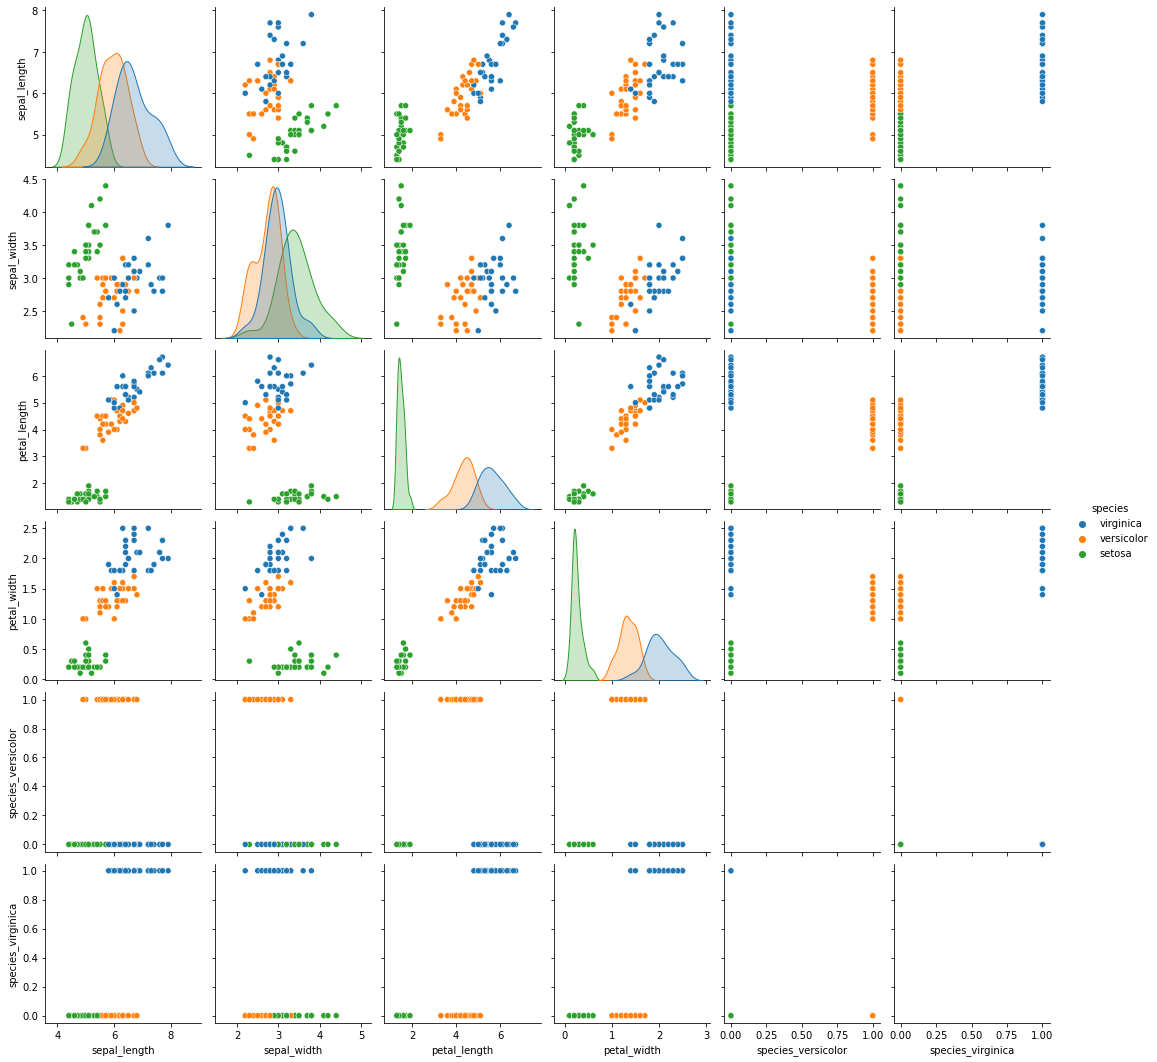

In [195]:
sns.pairplot(data = i_train, hue='species')

Visualize two numeric variables by means of the species. Hint: sns.relplot with hue or col

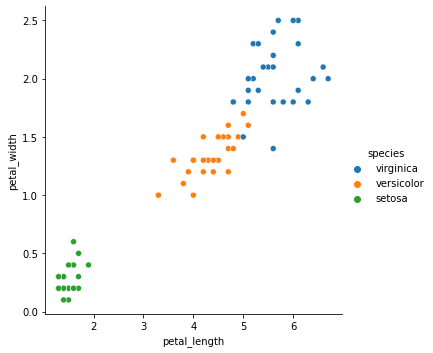

In [196]:
sns.relplot(data=i_train, x='petal_length', y='petal_width', hue='species')

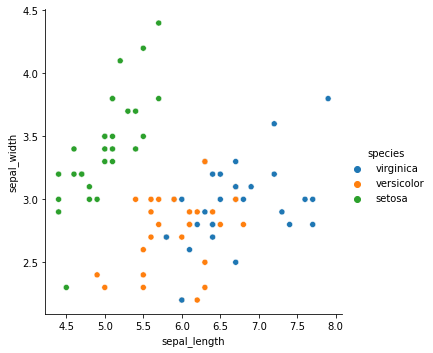

In [197]:
sns.relplot(data=i_train, x='sepal_length', y='sepal_width', hue='species')

Create a swarmplot using a melted dataframe of all your numeric variables. The x-axis should be the variable name, the y-axis the measure. Add another dimension using color to represent species. Document takeaways from this visualization.

In [182]:
i_train.sample(3)

,sepal_length,sepal_width,petal_length,petal_width,species,species_versicolor,species_virginica
79,5.7,2.6,3.5,1.0,versicolor,1,0
64,5.6,2.9,3.6,1.3,versicolor,1,0
134,6.1,2.6,5.6,1.4,virginica,0,1


In [135]:
melted_iris = pd.melt(i_train, id_vars = 'species')
melted_iris  = melted_iris[melted_iris.variable.isin(['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species'])]

<AxesSubplot:xlabel='variable', ylabel='value'>

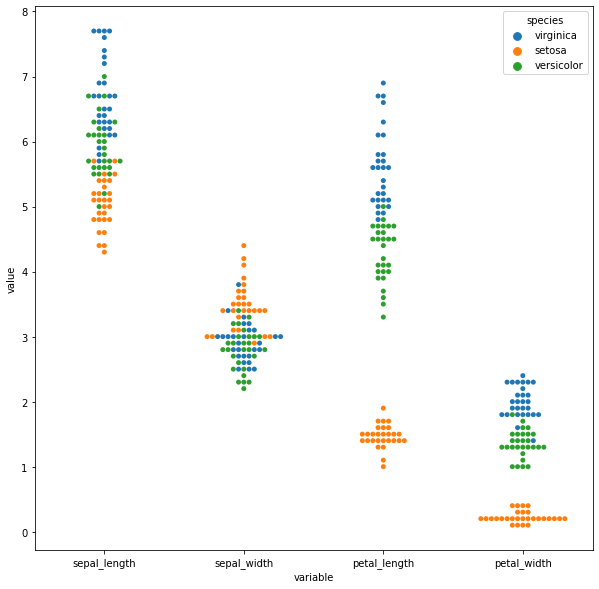

In [136]:
plt.figure(figsize=(10,10))
sns.swarmplot(data = melted_iris, x= 'variable', y='value', hue='species')

petal dimensions show the most distinct groupings


Ask a specific question of the data, such as: is the sepal area signficantly different in virginica compared to setosa? Answer the question through both a plot and using a mann-whitney or t-test. If you use a t-test, be sure assumptions are met (independence, normality, equal variance).

<AxesSubplot:xlabel='species'>

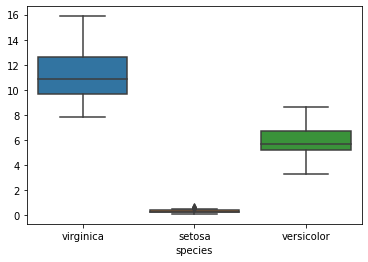

In [138]:
# Q: Is petal area significant between species?
# use a box plot
sns.boxplot(data=i_train, x='species',y=i_train.petal_length*i_train.petal_width)
#looks like there is a difference

In [148]:
#can use a t-test because species are independent
#sample size is almost large enough (28)
#look at the distributions
setosa = i_train[i_train.species == 'setosa']
(setosa.petal_length*setosa.petal_width).mean(), (setosa.petal_length*setosa.petal_width).median()

(0.3346428571428571, 0.30000000000000004)

In [147]:
virginica = i_train[i_train.species == 'virginica']
(virginica.petal_length*virginica.petal_width).mean(), (virginica.petal_length*virginica.petal_width).median()
#mean and median are very close. most likely normal enough

(11.220714285714285, 10.89)

In [152]:
(setosa.petal_length*setosa.petal_width).var(), (virginica.petal_length*virginica.petal_width).var()

(0.021773941798941796, 4.245984656084655)

In [153]:
#apply the t-test
# H_O : the mean area is not different
t, p = stats.ttest_ind(setosa.petal_length*setosa.petal_width, virginica.petal_length*virginica.petal_width, equal_var=False)
t, p

(-27.8836917026608, 1.3808037315319997e-21)

In [151]:
stats.mannwhitneyu(setosa.petal_length*setosa.petal_width, virginica.petal_length*virginica.petal_width, alternative='less')

MannwhitneyuResult(statistic=0.0, pvalue=6.811189715074213e-11)

it looks like the petal dimensions are likely the most important part of the data in determining the species

## titanic db

In [17]:
import prepare
import acquire
titanic_train, validata, test = prepare.split_titanic_data(acquire.get_titanic_data())

In [18]:
titanic_train

,survived,pclass,age,sibsp,parch,fare,alone,sex_male,embark_town_Queenstown,embark_town_Southampton
789,0,1,46.0,0,0,79.2000,1,1,0,0
88,1,1,23.0,3,2,263.0000,0,0,0,1
830,1,3,15.0,1,0,14.4542,0,0,0,0
728,0,2,25.0,1,0,26.0000,0,1,0,1
531,0,3,NaN,0,0,7.2292,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...
596,1,2,NaN,0,0,33.0000,1,0,0,1
36,1,3,NaN,0,0,7.2292,1,1,0,0
556,1,1,48.0,1,0,39.6000,0,0,0,0
593,0,3,NaN,0,2,7.7500,0,0,1,0


#### univariate stats

In [39]:
# get percent that survived
titanic_train.survived.mean() #only 0.38 survived

0.38353413654618473

In [42]:
#get counts of the classes
titanic_train.pclass.value_counts() # third class are over half the sample

3    273
1    119
2    106
Name: pclass, dtype: int64

In [72]:
titanic_train[titanic_train.survived == 1].pclass.value_counts()

1    75
3    67
2    49
Name: pclass, dtype: int64

In [73]:
titanic_train[titanic_train.survived == 0].pclass.value_counts()

3    206
2     57
1     44
Name: pclass, dtype: int64

first class are overrepresented in the survived group

<AxesSubplot:>

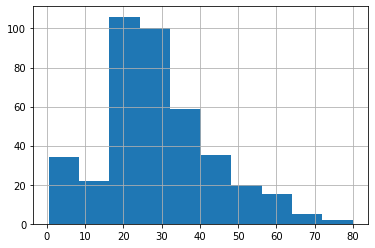

In [74]:
titanic_train.age.hist() #looks normal

<AxesSubplot:>

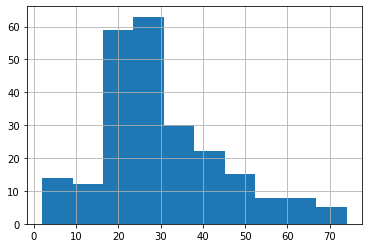

In [75]:
titanic_train[titanic_train.survived == 0].age.hist() 

<AxesSubplot:>

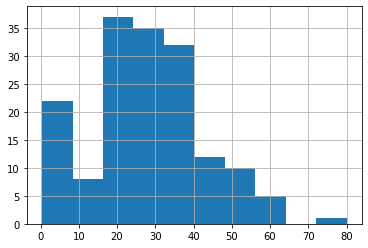

In [76]:
titanic_train[titanic_train.survived == 1].age.hist() 

age doesn't look that different across samples

In [19]:
# pclass is probably correlated with survival
observed = pd.crosstab(titanic_train.pclass, titanic_train.survived)
chi2, p, degf, expected = stats.chi2_contingency(observed)
p #reject H_0 : pclass and survived are dependent

9.147508147127235e-13

In [41]:
# fare for survived are probably different
# use a ttest
# samples are large enough
titanic_train[titanic_train.survived == 1].shape[0]
#survived vs not survived are independent
# H_0 : the mean fare for survived is <= mean fare for not survived
t, p = stats.mannwhitneyu(titanic_train[titanic_train.survived == 1].fare, 
                            titanic_train[titanic_train.survived == 0].fare,
                         alternative='greater')
p < 0.05

True

In [80]:
# females might be more likely to survive
# H_0 : gender and surival are not correlated
observed = pd.crosstab(titanic_train.sex_male, titanic_train.survived)
chi2, p, degf, expected = stats.chi2_contingency(observed)
p # < 0.05 ; reject the null

1.1618818438544924e-31

<AxesSubplot:xlabel='pclass', ylabel='age'>

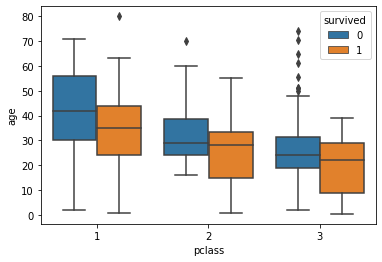

In [82]:
#what is the distibution  of age and survivors/class
sns.boxplot(x='pclass', y='age', data=titanic_train, hue = 'survived')

<AxesSubplot:xlabel='survived', ylabel='age'>

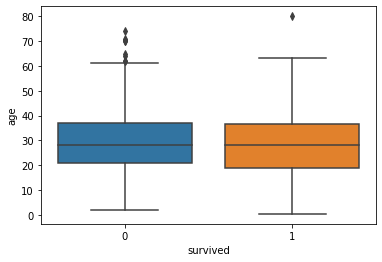

In [87]:
sns.boxplot(x='survived', y='age', data=titanic_train)

Look like third class, females, and higher fares are more likely to survive.  Age was surprisingly not much of a factor when only considering survival.

## telco_db

In [88]:
import prepare
import acquire
telco_df = acquire.get_telco_data()
telco_train, validate, test = prepare.split_telco_data(telco_df)

In [209]:
telco_train.head()

,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,...,streaming_movies_Yes,paperless_billing_Yes,churn_Yes,contract_type_One year,contract_type_Two year,payment_type_Credit card (automatic),payment_type_Electronic check,payment_type_Mailed check,internet_service_type_Fiber optic,internet_service_type_None
3784,5322-TEUJK,Female,0,Yes,Yes,71,Yes,Yes,Yes,Yes,...,1,0,0,0,1,0,0,0,1,0
5137,7233-PAHHL,Male,0,Yes,Yes,66,Yes,Yes,Yes,No,...,1,1,0,0,1,0,0,1,0,0
6217,8785-EPNCG,Male,0,No,No,11,Yes,Yes,No internet service,No internet service,...,0,0,1,0,0,1,0,0,0,1
5820,8191-XWSZG,Female,0,No,No,52,Yes,No,No internet service,No internet service,...,0,0,0,1,0,0,0,1,0,1
373,0556-FJEGU,Male,0,No,No,58,Yes,No,No,Yes,...,0,0,0,0,1,0,0,0,0,0


univariate stats

In [94]:
(telco_train.churn == 'Yes').mean() #0.26 customers churned

0.2656845313690627

In [279]:
#get list of categorical data
cat_var = telco_train.dtypes[telco_train.dtypes == 'object'].index.to_list()
cat_var.remove('customer_id')
cat_var.append('senior_citizen')

conds = []
props = []



In [96]:
telco_train.describe().iloc[:, 0:3]

,senior_citizen,tenure,monthly_charges
count,3937.000000,3937.000000,3937.000000
mean,0.160274,32.548133,64.707772
std,0.366907,24.650129,30.337173
min,0.000000,1.000000,18.250000
25%,0.000000,9.000000,35.000000
50%,0.000000,29.000000,70.400000
75%,0.000000,56.000000,89.900000
max,1.000000,72.000000,118.750000


In [97]:
telco_train[telco_train.churn == 'Yes'].describe().iloc[:, 0:3]

,senior_citizen,tenure,monthly_charges
count,1046.000000,1046.000000,1046.000000
mean,0.248566,18.365201,74.473136
std,0.432388,19.933826,25.046012
min,0.000000,1.000000,18.950000
25%,0.000000,2.000000,55.862500
50%,0.000000,10.000000,79.875000
75%,0.000000,29.000000,94.537500
max,1.000000,72.000000,118.350000


the % of seniors is higher in churned customers, churned customers have a shorter tenure, and are probably paying about $10 more.

In [199]:
telco_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3937 entries, 3784 to 817
Data columns (total 48 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   customer_id                            3937 non-null   object 
 1   gender                                 3937 non-null   object 
 2   senior_citizen                         3937 non-null   int64  
 3   partner                                3937 non-null   object 
 4   dependents                             3937 non-null   object 
 5   tenure                                 3937 non-null   int64  
 6   phone_service                          3937 non-null   object 
 7   multiple_lines                         3937 non-null   object 
 8   online_security                        3937 non-null   object 
 9   online_backup                          3937 non-null   object 
 10  device_protection                      3937 non-null   object 
 11  te

In [200]:
#consider all the catagorical data and pair it with churn.  Do a χ^2 for each pair
cat_not_churn = telco_train.dtypes[telco_train.dtypes == 'uint8'].index.to_list()
# cat_not_churn.remove('churn')
# cat_not_churn.remove('customer_id')
# cat_not_churn.append('senior_citizen')

alpha = 0.05
cols =  []
rej = []
p_val = []

for cat in cat_not_churn:
    obs = pd.crosstab(telco_train.churn, telco_train[cat])
    cols.append(f"churn x {cat}")
    chi2, p, degf, expected = stats.chi2_contingency(obs)
    rej.append(p < alpha)
    p_val.append(p)

ind_var = pd.DataFrame({
    'comapring':cols,
    'reject?':rej,
    'p-value':p_val
})
ind_var[ind_var['reject?']==True].sort_values('p-value')
ind_var.sort_values('p-value')

,comapring,reject?,p-value
19,churn x churn_Yes,True,0.000000e+00
25,churn x internet_service_type_Fiber optic,True,2.077846e-80
21,churn x contract_type_Two year,True,6.112922e-77
23,churn x payment_type_Electronic check,True,9.749677e-71
26,churn x internet_service_type_None,True,3.234861e-45
6,churn x online_security_No internet service,True,3.234861e-45
8,churn x online_backup_No internet service,True,3.234861e-45
16,churn x streaming_movies_No internet service,True,3.234861e-45
10,churn x device_protection_No internet service,True,3.234861e-45
14,churn x streaming_tv_No internet service,True,3.234861e-45


consider broader categories before specialized services

In [101]:
#investigate contract type
pd.crosstab(telco_train.contract_type, telco_train.churn) #higher proportion of month-to-month contracts are churning

churn,No,Yes
contract_type,,
Month-to-month,1270,922
One year,706,93
Two year,915,31


In [158]:
telco_train_mm = telco_train[telco_train.contract_type == 'Month-to-month']
(telco_train_mm.churn=='Yes').mean() #0.42
telco_train_n_mm = telco_train[telco_train.contract_type != 'Month-to-month']
(telco_train_n_mm.churn == 'Yes').mean() #0.07

0.07106017191977078

churn among month to month customers is higher than among non-month-to-month

In [125]:
#investigate internet service
pd.crosstab(telco_train.internet_service_type, telco_train.churn, margins=True)
#suspect that fiber optic might be significant

churn,No,Yes,All
internet_service_type,,,
DSL,1081,255,1336
Fiber optic,1018,725,1743
None,792,66,858
All,2891,1046,3937


In [176]:
# H_O : churn and fiber optic are independent
internet_types = ['DSL', 'Fiber optic','None']

cols = []
rej = []
p_val = []

for int_type in internet_types:
    cols.append(f"churn x {int_type}")
    obs = pd.crosstab(telco_train.internet_service_type == int_type, telco_train.churn)
    chi2, p, degf, expected = stats.chi2_contingency(obs)
    rej.append(p < alpha)
    p_val.append(p)
    
int_types = pd.DataFrame({
    'comapring':cols,
    'reject?':rej,
    'p-value':p_val
})
int_types

,comapring,reject?,p-value
0,churn x DSL,True,3.483452e-14
1,churn x Fiber optic,True,2.077846e-80
2,churn x None,True,3.234861e-45


Contract type (month-to-month) is most likely a good indicator of churn.  All internet users are more likely to churn

In [144]:
# now compare churn and non churn for numeric data
# since there are only three, just directly calculate using 
#these will be two sample t-tests, one tail
# H_0 : mu for churn@col <= mu for not churn@col
num_col = ['tenure', 'monthly_charges', 'total_charges']

telco_churn = telco_train[telco_train.churn == 'Yes']
telco_nochurn = telco_train[telco_train.churn == 'No']

cols = []
rej = []
p_val = []

for col in num_col:
    cols.append(f"churn x {col}")
    #compare variance
    churn_series = telco_churn[col]
    nochurn_series = telco_nochurn[col]
    #now do the mw test
    t, p = stats.mannwhitneyu(churn_series, nochurn_series, alternative= 'greater')
    reject = p/2 < alpha
    rej.append(reject)
    p_val.append(p)

mannw_test = {
    'columns': cols,
    'reject?': rej,
    'p-value':p_val
}
mannw_test = pd.DataFrame(mannw_test)
mannw_test[mannw_test['reject?']==True].sort_values('p-value')

,columns,reject?,p-value
1,churn x monthly_charges,True,1.197223e-31


(array([ 92.,  28.,  73.,  76.,  27., 192., 197., 178., 154.,  29.]),
 array([ 18.95,  28.89,  38.83,  48.77,  58.71,  68.65,  78.59,  88.53,
         98.47, 108.41, 118.35]),
 <BarContainer object of 10 artists>)

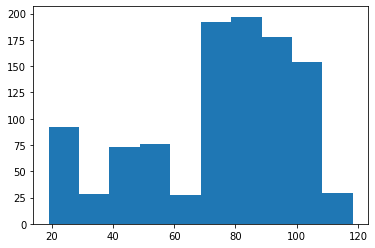

In [99]:
#monthly charges might be considered normal, do a t-test
plt.hist(telco_churn.monthly_charges)

In [177]:

churn_series = telco_churn['monthly_charges']
nochurn_series = telco_nochurn['monthly_charges']
l_t, l_p = stats.levene(churn_series, nochurn_series)
levene_bool = not l_p < alpha
    #now do the t test
t, p = stats.ttest_ind(churn_series, nochurn_series, equal_var= levene_bool)
p/2 < alpha, p

(True, 2.856591485063621e-41)

Monthly charges tend to be higher among churned customers